# Task


## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
data  = pd.read_csv('student_engagement_data_10000.csv')

## Describe data using .info() method

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


## Describe data using .Describe() method

In [4]:
data.describe()

,Student ID,Session ID,Performance Metrics
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,149.762700,74.674300
std,2886.89568,28.783232,14.383404
min,1.00000,100.000000,50.000000
25%,2500.75000,125.000000,62.000000
50%,5000.50000,150.000000,75.000000
75%,7500.25000,174.000000,87.000000
max,10000.00000,199.000000,99.000000


## Count nan Values in each coloumns

In [5]:
data.isna().sum()

Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

## Value counts of categorical columns like learning_mode, student_id, etc.

In [6]:
for i in data['Engagement Level'].unique():
   print(f"Engagement Level Value Count {i}: {data['Engagement Level'].tolist().count(i)}")
print()
print()
for i in data['Attention Level'].unique():
   print(f"Attention Level Value Count {i}: {data['Attention Level'].tolist().count(i)}")
print()
print()
for i in data['Internet Connectivity'].unique():
   print(f"Internet Connectivity Value Count {i}: {data['Internet Connectivity'].tolist().count(i)}")
print()
print()
for i in data['Adaptivity Level'].unique():
   print(f"Adaptivity Level Value Count {i}: {data['Adaptivity Level'].tolist().count(i)}")
print()
print()
for i in data['Learning Mode Prediction'].unique():
   print(f"Learning Mode Prediction Value Count {i}: {data['Learning Mode Prediction'].tolist().count(i)}")


Engagement Level Value Count High: 3277
Engagement Level Value Count Low: 3366
Engagement Level Value Count Moderate: 3357


Attention Level Value Count High: 3317
Attention Level Value Count Moderate: 3385
Attention Level Value Count Low: 3298


Internet Connectivity Value Count High (Mobile/Wi-Fi): 3321
Internet Connectivity Value Count Moderate (Wi-Fi): 3389
Internet Connectivity Value Count Low (Mobile): 3290


Adaptivity Level Value Count Moderate: 3360
Adaptivity Level Value Count High: 3309
Adaptivity Level Value Count Low: 3331


Learning Mode Prediction Value Count Visual Learner: 3300
Learning Mode Prediction Value Count Auditory Learner: 3326
Learning Mode Prediction Value Count Kinesthetic Learner: 3374


## Plot line charts for daily trends.

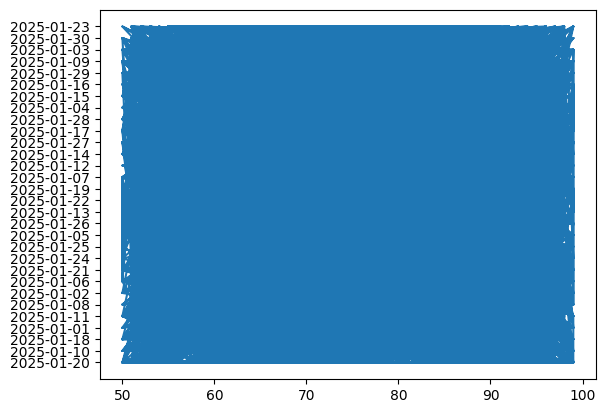

In [7]:
plt.close()

x = data['Performance Metrics']
y = data['Date']

plt.plot(x,y)
plt.show()

## A bar chart to compare modes.

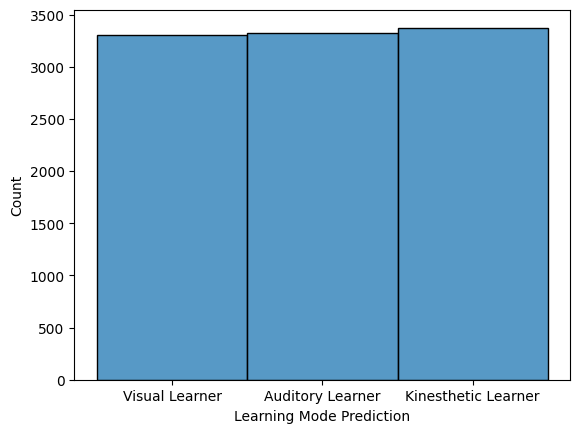

In [8]:
plt.close()

sns.histplot(data = data , x = 'Learning Mode Prediction' )
plt.show()

## Group by date and calculate average Attention Level and Engagement Level.

In [9]:
def masking(value):
    if value == 'Low':
        return 1
    elif value == 'Moderate':
        return 2
    elif value == 'High':
        return 3
    else:
        return 0



data['Engagement Level num'] = data['Engagement Level'].apply(masking)
data['Attention Level num'] = data['Attention Level'].apply(masking)
data['Adaptivity Level num'] = data['Adaptivity Level'].apply(masking)

data.drop('Engagement Level' , axis = 1  , inplace = True)
data.drop('Attention Level' , axis = 1  , inplace = True)
data.drop('Adaptivity Level' , axis = 1  , inplace = True)

data.rename(columns = {'Engagement Level num':'Engagement Level'} , inplace = True)
data.rename(columns = {'Attention Level num':'Attention Level'} , inplace = True)
data.rename(columns = {'Adaptivity Level num':'Adaptivity Level'} , inplace = True)

group_by_dated = data.groupby('Date')

group_names = data['Date'].unique().tolist()



mean_dic = {}
for i in group_names:
    for a in range(1,3):
        if a == 1:
            if round(group_by_dated.get_group(i)['Attention Level'].mean().tolist()) == 1:
                check = 'Low'
            elif round(group_by_dated.get_group(i)['Attention Level'].mean().tolist()) == 2:
                check = 'Moderate'
            elif round(group_by_dated.get_group(i)['Attention Level'].mean().tolist()) == 3:
                check = 'High'
            else:
                check = 'Unknown'
            mean_dic[f'{i} Mean Attention Level'] = check
            
        else:
            if round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 1:
                check = 'Low'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 2:
                check = 'Moderate'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 3:
                check = 'High'
            else:
                check = 'Unknown'
            mean_dic[f'{i} Mean Engagement Level'] = check
for key , val in mean_dic.items():
    print(f"{key} : {val}")

2025-01-20 Mean Attention Level : Moderate
2025-01-20 Mean Engagement Level : Moderate
2025-01-10 Mean Attention Level : Moderate
2025-01-10 Mean Engagement Level : Moderate
2025-01-18 Mean Attention Level : Moderate
2025-01-18 Mean Engagement Level : Moderate
2025-01-01 Mean Attention Level : Moderate
2025-01-01 Mean Engagement Level : Moderate
2025-01-11 Mean Attention Level : Moderate
2025-01-11 Mean Engagement Level : Moderate
2025-01-08 Mean Attention Level : Moderate
2025-01-08 Mean Engagement Level : Moderate
2025-01-02 Mean Attention Level : Moderate
2025-01-02 Mean Engagement Level : Moderate
2025-01-06 Mean Attention Level : Moderate
2025-01-06 Mean Engagement Level : Moderate
2025-01-21 Mean Attention Level : Moderate
2025-01-21 Mean Engagement Level : Moderate
2025-01-24 Mean Attention Level : Moderate
2025-01-24 Mean Engagement Level : Moderate
2025-01-25 Mean Attention Level : Moderate
2025-01-25 Mean Engagement Level : Moderate
2025-01-05 Mean Attention Level : Moderate


## Group by learning_mode and compute average engagement.

In [10]:
group_by_dated = data.groupby('Learning Mode Prediction')

group_names = data['Learning Mode Prediction'].unique().tolist()



mean_dic = {}
for i in group_names:
 
            if round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 1:
                check = 'Low'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 2:
                check = 'Moderate'
            elif round(group_by_dated.get_group(i)['Engagement Level'].mean().tolist()) == 3:
                check = 'High'
            else:
                check = 'Unknown'
            mean_dic[f'{i} Mean Engagement Level'] = check
for key , val in mean_dic.items():
    print(f"{key} : {val}")

Visual Learner Mean Engagement Level : Moderate
Auditory Learner Mean Engagement Level : Moderate
Kinesthetic Learner Mean Engagement Level : Moderate
